In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.6.0'

In [4]:
fashion_mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
#validation세트 만들고 경사하강법을 위해 255로 나눠줌(0~1)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.0

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","bas","Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

### 아래의 Flatten layer는 28 * 28행렬을 784배열로 바꿔줌

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
### 위와 동일

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
from keras.layers import Dense
output_layer = Dense(10)

In [13]:
output_layer

In [14]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

In [15]:
output_layer

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [19]:
#model.get_layer("dense_50") is hidden1

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[-0.03543511, -0.0129826 ,  0.00898105, ...,  0.04662281,
         0.05882287,  0.01642796],
       [-0.04709008,  0.03610867, -0.03951205, ..., -0.06871545,
        -0.00412467,  0.05927852],
       [ 0.03598322,  0.03991836,  0.02044043, ...,  0.05711921,
         0.06937329,  0.01098878],
       ...,
       [-0.0580045 ,  0.03753991, -0.02529799, ...,  0.05661146,
        -0.02525709,  0.01373568],
       [-0.02845615,  0.05148645, -0.03450632, ...,  0.01434144,
         0.06778738,  0.0732546 ],
       [ 0.037444  , -0.01956991, -0.01086573, ...,  0.00867228,
        -0.07186199,  0.06270882]], dtype=float32)

In [22]:
### 첫번쨰 층인 784입력층에 300개 은닝층에 대한 가중치이므로 784 * 300

weights.shape

(784, 300)

In [23]:
###Flatten층은 데이터 변환만 해주므로 편향이 없음

biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

## optimizer는 가중치 학습방법 (SGD , adam?)등등
## loss는 트레이닝시 사용하는 손실함수(rmse, acc)등등
## metrics는 훈련이 아니라 성능평가시에만 사용됨->loss와 동일한 함수 사용가능

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [26]:
### validation_data에 Valid셋을 넣는것 보다는 0.1같은 비율을 넣어 나눠주는게 더 편함

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7037 - accuracy: 0.7675 - val_loss: 0.4934 - val_accuracy: 0.8394
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4832 - accuracy: 0.8319 - val_loss: 0.4688 - val_accuracy: 0.8340
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4402 - accuracy: 0.8465 - val_loss: 0.4219 - val_accuracy: 0.8608
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4133 - accuracy: 0.8539 - val_loss: 0.4038 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3930 - accuracy: 0.8616 - val_loss: 0.3781 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3762 - accuracy: 0.8675 - val_loss: 0.3706 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 2s 978us/step - loss: 0.3621 - accuracy: 0.8717 - val_loss: 0.3742 - val_accurac

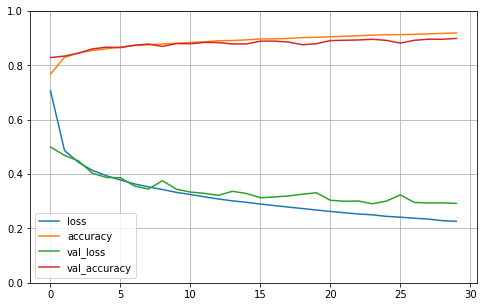

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
history.history["loss"]

[0.7069084644317627,
 0.4869307279586792,
 0.4430992901325226,
 0.4134500324726105,
 0.3937191069126129,
 0.37825652956962585,
 0.3637840449810028,
 0.35306426882743835,
 0.34317103028297424,
 0.33266374468803406,
 0.3248800039291382,
 0.31631115078926086,
 0.30827733874320984,
 0.30153802037239075,
 0.29623115062713623,
 0.28984519839286804,
 0.2841196656227112,
 0.2785862982273102,
 0.2731582522392273,
 0.26778724789619446,
 0.2625683844089508,
 0.2577129602432251,
 0.25321754813194275,
 0.25011348724365234,
 0.24443966150283813,
 0.24137349426746368,
 0.2375958114862442,
 0.23442772030830383,
 0.22859109938144684,
 0.22623217105865479]

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 672us/step - loss: 0.3237 - accuracy: 0.8857


[0.32374727725982666, 0.885699987411499]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
### model.predict_classes함수와 같음

y_proba.argmax(axis=1)

array([9, 2, 1], dtype=int64)

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
###   input_shape매개변수 형태에 chk'
###    과대적합을 막기위해 은닉층과 뉴런수를 줄임

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
model.save("my_keras.h5")

Epoch 1/20
363/363 [==============================] - 0s 770us/step - loss: 1.2447 - val_loss: 0.6088
Epoch 2/20
363/363 [==============================] - 0s 553us/step - loss: 0.5401 - val_loss: 0.5574
Epoch 3/20
363/363 [==============================] - 0s 537us/step - loss: 0.4566 - val_loss: 0.4690
Epoch 4/20
363/363 [==============================] - 0s 626us/step - loss: 0.5562 - val_loss: 0.7066
Epoch 5/20
363/363 [==============================] - 0s 536us/step - loss: 0.4262 - val_loss: 0.3846
Epoch 6/20
363/363 [==============================] - 0s 538us/step - loss: 0.4040 - val_loss: 0.3786
Epoch 7/20
363/363 [==============================] - 0s 587us/step - loss: 0.3969 - val_loss: 0.3674
Epoch 8/20
363/363 [==============================] - 0s 544us/step - loss: 0.3897 - val_loss: 0.3658
Epoch 9/20
363/363 [==============================] - 0s 536us/step - loss: 0.3848 - val_loss: 0.3575
Epoch 10/20
363/363 [==============================] - 0s 534us/step - loss: 0.381

In [34]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
  1/363 [..............................] - ETA: 57s - loss: 7.9062

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


363/363 [==============================] - 0s 778us/step - loss: 1.9264 - val_loss: 0.7738
Epoch 2/20
363/363 [==============================] - 0s 595us/step - loss: 0.7177 - val_loss: 0.6441
Epoch 3/20
363/363 [==============================] - 0s 572us/step - loss: 0.6524 - val_loss: 0.5932
Epoch 4/20
363/363 [==============================] - 0s 621us/step - loss: 0.6090 - val_loss: 0.5571
Epoch 5/20
363/363 [==============================] - 0s 583us/step - loss: 0.5753 - val_loss: 0.5284
Epoch 6/20
363/363 [==============================] - 0s 573us/step - loss: 0.5486 - val_loss: 0.5080
Epoch 7/20
363/363 [==============================] - 0s 580us/step - loss: 0.5280 - val_loss: 0.4890
Epoch 8/20
363/363 [==============================] - 0s 586us/step - loss: 0.5115 - val_loss: 0.4739
Epoch 9/20
363/363 [==============================] - 0s 579us/step - loss: 0.4980 - val_loss: 0.4630
Epoch 10/20
363/363 [==============================] - 0s 592us/step - loss: 0.4878 - val_los

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs = [output])

In [36]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 943us/step - loss: 2.1883 - val_loss: 0.9576
Epoch 2/20
363/363 [==============================] - 0s 668us/step - loss: 0.8242 - val_loss: 0.7123
Epoch 3/20
363/363 [==============================] - 0s 629us/step - loss: 0.6988 - val_loss: 0.6436
Epoch 4/20
363/363 [==============================] - 0s 628us/step - loss: 0.6453 - val_loss: 0.6021
Epoch 5/20
363/363 [==============================] - 0s 723us/step - loss: 0.6112 - val_loss: 0.5740
Epoch 6/20
363/363 [==============================] - 0s 671us/step - loss: 0.5861 - val_loss: 0.5553
Epoch 7/20
363/363 [==============================] - 0s 615us/step - loss: 0.5673 - val_loss: 0.5359
Epoch 8/20
363/363 [==============================] - 0s 746us/step - loss: 0.5526 - val_loss: 0.5297
Epoch 9/20
363/363 [==============================] - 0s 651us/step - loss: 0.5413 - val_loss: 0.5150
Epoch 10/20
363/363 [==============================] - 0s 637us/step - loss: 0.531

In [37]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 847us/step - loss: 0.4782 - val_loss: 0.4577
Epoch 2/20
363/363 [==============================] - 0s 631us/step - loss: 0.4752 - val_loss: 0.4533
Epoch 3/20
363/363 [==============================] - 0s 621us/step - loss: 0.4724 - val_loss: 0.4498
Epoch 4/20
363/363 [==============================] - 0s 615us/step - loss: 0.4696 - val_loss: 0.4477
Epoch 5/20
363/363 [==============================] - 0s 641us/step - loss: 0.4675 - val_loss: 0.4484
Epoch 6/20
363/363 [==============================] - 0s 610us/step - loss: 0.4647 - val_loss: 0.4446
Epoch 7/20
363/363 [==============================] - 0s 621us/step - loss: 0.4625 - val_loss: 0.4406
Epoch 8/20
363/363 [==============================] - 0s 619us/step - loss: 0.4609 - val_loss: 0.4389
Epoch 9/20
363/363 [==============================] - 0s 642us/step - loss: 0.4582 - val_loss: 0.4380
Epoch 10/20
363/363 [==============================] - 0s 650us/step - loss: 0.456

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [39]:
###손실 mse로 전달가능하며 이때 두 출력에 모두 적용됨

model.compile(loss=["mse", "mse"], loss_weights = [0.9, 0.1], optimizer="sgd")

In [40]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4306 - main_output_loss: 1.3380 - aux_output_loss: 2.2643 - val_loss: 0.8937 - val_main_output_loss: 0.8153 - val_aux_output_loss: 1.5990
Epoch 2/20
363/363 [==============================] - 0s 906us/step - loss: 0.6091 - main_output_loss: 0.5366 - aux_output_loss: 1.2621 - val_loss: 0.5342 - val_main_output_loss: 0.4680 - val_aux_output_loss: 1.1305
Epoch 3/20
363/363 [==============================] - 0s 901us/step - loss: 0.5280 - main_output_loss: 0.4727 - aux_output_loss: 1.0250 - val_loss: 0.4861 - val_main_output_loss: 0.4352 - val_aux_output_loss: 0.9439
Epoch 4/20
363/363 [==============================] - 0s 894us/step - loss: 0.4913 - main_output_loss: 0.4498 - aux_output_loss: 0.8642 - val_loss: 0.4650 - val_main_output_loss: 0.4269 - val_aux_output_loss: 0.8077
Epoch 5/20
363/363 [==============================] - 0s 893us/step - loss: 0.4715 - main_output_loss: 0.4390 - aux_output_loss: 0.7638 - 

In [41]:
total_loss ,main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 586us/step - loss: 0.3930 - main_output_loss: 0.3785 - aux_output_loss: 0.5244


In [42]:
y_pred_main, y_pre_aux = model.predict([X_new_A, X_new_B])

In [43]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers,Dense(1)
        self.aux_output = keras.layers,Dense(1)        
        
        def call(self, inputs):
            input_A, input_B = inputs
            hidden1 = self.hidden1(input_B)
            hidden2 = self.hidden2(hidden1)
            concat = keras.layers.concatenate([input_A, hidden2])
            main_output = self.main_output(concat)
            aux_output = self.aux_output(hidden2)
            return main_output, aux_output
model = WideAndDeepModel()

In [44]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
363/363 [==============================] - 0s 478us/step - loss: 1.2925
Epoch 2/10
363/363 [==============================] - 0s 435us/step - loss: 1.4331
Epoch 3/10
363/363 [==============================] - 0s 430us/step - loss: 5.2633
Epoch 4/10
363/363 [==============================] - 0s 451us/step - loss: 15.7410
Epoch 5/10
363/363 [==============================] - 0s 427us/step - loss: nan
Epoch 6/10
363/363 [==============================] - 0s 448us/step - loss: nan
Epoch 7/10
363/363 [==============================] - 0s 434us/step - loss: nan
Epoch 8/10
363/363 [==============================] - 0s 442us/step - loss: nan
Epoch 9/10
363/363 [==============================] - 0s 430us/step - loss: nan
Epoch 10/10
363/363 [==============================] - 0s 472us/step - loss: nan


In [45]:
### 그냥 mocel.save를 위한 퍼셉트론

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10)
model.save("my_keras.h5")

Epoch 1/10
363/363 [==============================] - 0s 445us/step - loss: 2.0426
Epoch 2/10
363/363 [==============================] - 0s 425us/step - loss: 0.7603
Epoch 3/10
363/363 [==============================] - 0s 424us/step - loss: 0.6733
Epoch 4/10
363/363 [==============================] - 0s 419us/step - loss: 0.6364
Epoch 5/10
363/363 [==============================] - 0s 425us/step - loss: 0.6078
Epoch 6/10
363/363 [==============================] - 0s 424us/step - loss: 0.5834
Epoch 7/10
363/363 [==============================] - 0s 446us/step - loss: 0.5628
Epoch 8/10
363/363 [==============================] - 0s 430us/step - loss: 0.5453
Epoch 9/10
363/363 [==============================] - 0s 420us/step - loss: 0.5303
Epoch 10/10
363/363 [==============================] - 0s 422us/step - loss: 0.5176


In [50]:
model = keras.models.load_model("my_keras.h5")

In [52]:
### 학습 길어지면 model.fit시에 매개변수에 체크포인트를 넣어 중간중간 저장한다

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 451us/step - loss: 0.4288
Epoch 2/10
363/363 [==============================] - 0s 452us/step - loss: 0.4269
Epoch 3/10
363/363 [==============================] - 0s 447us/step - loss: 0.4252
Epoch 4/10
363/363 [==============================] - 0s 446us/step - loss: 0.4235
Epoch 5/10
363/363 [==============================] - 0s 487us/step - loss: 0.4219
Epoch 6/10
363/363 [==============================] - 0s 525us/step - loss: 0.4203
Epoch 7/10
363/363 [==============================] - 0s 582us/step - loss: 0.4179
Epoch 8/10
363/363 [==============================] - 0s 462us/step - loss: 0.4170
Epoch 9/10
363/363 [==============================] - 0s 458us/step - loss: 0.4157
Epoch 10/10
363/363 [==============================] - 0s 481us/step - loss: 0.4137


In [55]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras.h5")

Epoch 1/100
363/363 [==============================] - 0s 637us/step - loss: 0.3433 - val_loss: 0.3335
Epoch 2/100
363/363 [==============================] - 0s 595us/step - loss: 0.3425 - val_loss: 0.3309
Epoch 3/100
363/363 [==============================] - 0s 599us/step - loss: 0.3423 - val_loss: 0.3328
Epoch 4/100
363/363 [==============================] - 0s 574us/step - loss: 0.3413 - val_loss: 0.3312
Epoch 5/100
363/363 [==============================] - 0s 587us/step - loss: 0.3414 - val_loss: 0.3297
Epoch 6/100
363/363 [==============================] - 0s 751us/step - loss: 0.3405 - val_loss: 0.3342
Epoch 7/100
363/363 [==============================] - 0s 622us/step - loss: 0.3401 - val_loss: 0.3306
Epoch 8/100
363/363 [==============================] - 0s 578us/step - loss: 0.3397 - val_loss: 0.3297
Epoch 9/100
363/363 [==============================] - 0s 590us/step - loss: 0.3391 - val_loss: 0.3313
Epoch 10/100
363/363 [==============================] - 0s 586us/step - l

Epoch 80/100
363/363 [==============================] - 0s 586us/step - loss: 0.3142 - val_loss: 0.3072
Epoch 81/100
363/363 [==============================] - 0s 608us/step - loss: 0.3139 - val_loss: 0.3070
Epoch 82/100
363/363 [==============================] - 0s 607us/step - loss: 0.3134 - val_loss: 0.3082
Epoch 83/100
363/363 [==============================] - 0s 601us/step - loss: 0.3134 - val_loss: 0.3078
Epoch 84/100
363/363 [==============================] - 0s 579us/step - loss: 0.3130 - val_loss: 0.3061
Epoch 85/100
363/363 [==============================] - 0s 681us/step - loss: 0.3127 - val_loss: 0.3084
Epoch 86/100
363/363 [==============================] - 0s 597us/step - loss: 0.3121 - val_loss: 0.3069
Epoch 87/100
363/363 [==============================] - 0s 579us/step - loss: 0.3121 - val_loss: 0.3063
Epoch 88/100
363/363 [==============================] - 0s 613us/step - loss: 0.3117 - val_loss: 0.3056
Epoch 89/100
363/363 [==============================] - 0s 635us

In [60]:
##위와 같은 조기종료인데 patience매개변수로 일정량동안 성능이 오르지 않을때 자동종료 설정이가능하므로 epoch를 크게 설정가능

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 631us/step - loss: 0.3012 - val_loss: 0.2991
Epoch 2/100
363/363 [==============================] - 0s 574us/step - loss: 0.3013 - val_loss: 0.2988
Epoch 3/100
363/363 [==============================] - 0s 573us/step - loss: 0.3014 - val_loss: 0.3008
Epoch 4/100
363/363 [==============================] - 0s 594us/step - loss: 0.3012 - val_loss: 0.3017
Epoch 5/100
363/363 [==============================] - 0s 592us/step - loss: 0.3012 - val_loss: 0.2990
Epoch 6/100
363/363 [==============================] - 0s 626us/step - loss: 0.3004 - val_loss: 0.2988
Epoch 7/100
363/363 [==============================] - 0s 743us/step - loss: 0.3006 - val_loss: 0.2993
Epoch 8/100
363/363 [==============================] - 0s 618us/step - loss: 0.3000 - val_loss: 0.3001
Epoch 9/100
363/363 [==============================] - 0s 582us/step - loss: 0.3000 - val_loss: 0.3015
Epoch 10/100
363/363 [==============================] - 0s 569us/step - l

###  def on_epoch_end 뿐만 아니라 on_train_begin(), on_batch_end() ++ 평가를 위해 test에도 사용가능

In [62]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [63]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/5
363/363 [==============================] - 0s 656us/step - loss: 0.2979 - val_loss: 0.2979

val/train: 1.00
Epoch 2/5
363/363 [==============================] - 0s 591us/step - loss: 0.2975 - val_loss: 0.2968

val/train: 1.00
Epoch 3/5
363/363 [==============================] - 0s 580us/step - loss: 0.2977 - val_loss: 0.2958

val/train: 0.99
Epoch 4/5
363/363 [==============================] - 0s 578us/step - loss: 0.2975 - val_loss: 0.2971

val/train: 1.00
Epoch 5/5
363/363 [==============================] - 0s 648us/step - loss: 0.2973 - val_loss: 0.2976

val/train: 1.00


In [76]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [77]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 749us/step - loss: 0.2895 - val_loss: 0.2916
Epoch 2/30
363/363 [==============================] - 0s 614us/step - loss: 0.2893 - val_loss: 0.2933
Epoch 3/30
363/363 [==============================] - 0s 607us/step - loss: 0.2892 - val_loss: 0.2915
Epoch 4/30
363/363 [==============================] - 0s 607us/step - loss: 0.2888 - val_loss: 0.2920
Epoch 5/30
363/363 [==============================] - 0s 817us/step - loss: 0.2884 - val_loss: 0.2933
Epoch 6/30
363/363 [==============================] - 0s 698us/step - loss: 0.2885 - val_loss: 0.2939
Epoch 7/30
363/363 [==============================] - 0s 725us/step - loss: 0.2887 - val_loss: 0.2924
Epoch 8/30
363/363 [==============================] - 0s 603us/step - loss: 0.2886 - val_loss: 0.2943
Epoch 9/30
363/363 [==============================] - 0s 583us/step - loss: 0.2880 - val_loss: 0.2903
Epoch 10/30
363/363 [==============================] - 0s 676us/step - loss: 0.288

In [78]:
%load_ext tensorboard
%tensorboard --logdir=C:\Users\hjhhi\Desktop\Codes\Hands-on-ML\my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13980), started 0:02:39 ago. (Use '!kill 13980' to kill it.)

In [41]:

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=3e-3))

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [33]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [42]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [43]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

ValueError: The first argument to `Layer.call` must always be passed.

In [85]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 530us/step - loss: 0.3767


In [86]:
y_pred = keras_reg.predict(X_new)

In [36]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_dist, n_iter=10, cv=3)

In [37]:
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
  1/242 [..............................] - ETA: 34s - loss: 6.8047

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.7042 - val_loss: 0.7737
Epoch 2/100
242/242 [==============================] - 0s 839us/step - loss: 0.6654 - val_loss: 0.6368
Epoch 3/100
242/242 [==============================] - 0s 739us/step - loss: 0.5884 - val_loss: 0.5943
Epoch 4/100
242/242 [==============================] - 0s 761us/step - loss: 0.5439 - val_loss: 0.5498
Epoch 5/100
242/242 [==============================] - 0s 701us/step - loss: 0.5098 - val_loss: 0.5188
Epoch 6/100
242/242 [==============================] - 0s 763us/step - loss: 0.4835 - val_loss: 0.4961
Epoch 7/100
242/242 [==============================] - 0s 694us/step - loss: 0.4635 - val_loss: 0.4783
Epoch 8/100
242/242 [==============================] - 0s 759us/step - loss: 0.4486 - val_loss: 0.4641
Epoch 9/100
242/242 [==============================] - 0s 761us/step - loss: 0.4362 - val_loss: 0.4555
Epoch 10/100
242/242 [==============================] - 0s 774us/step - loss: 0.4273 - 

242/242 [==============================] - 0s 969us/step - loss: 0.3006 - val_loss: 0.3481
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2997 - val_loss: 0.3503
Epoch 82/100
242/242 [==============================] - 0s 959us/step - loss: 0.3000 - val_loss: 0.3421
Epoch 83/100
242/242 [==============================] - 0s 766us/step - loss: 0.2985 - val_loss: 0.3485
Epoch 84/100
242/242 [==============================] - 0s 748us/step - loss: 0.2979 - val_loss: 0.3481
Epoch 85/100
242/242 [==============================] - 0s 719us/step - loss: 0.2975 - val_loss: 0.3458
Epoch 86/100
242/242 [==============================] - 0s 728us/step - loss: 0.2965 - val_loss: 0.3474
Epoch 87/100
242/242 [==============================] - 0s 705us/step - loss: 0.2967 - val_loss: 0.3451
Epoch 88/100
242/242 [==============================] - 0s 758us/step - loss: 0.2953 - val_loss: 0.3448
Epoch 89/100
242/242 [==============================] - 0s 730us/step - loss: 0

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.4117 - val_loss: 0.8423
Epoch 2/100
242/242 [==============================] - 0s 731us/step - loss: 0.6752 - val_loss: 0.6971
Epoch 3/100
242/242 [==============================] - 0s 730us/step - loss: 0.5999 - val_loss: 0.6372
Epoch 4/100
242/242 [==============================] - 0s 787us/step - loss: 0.5579 - val_loss: 0.5909
Epoch 5/100
242/242 [==============================] - 0s 741us/step - loss: 0.5262 - val_loss: 0.5701
Epoch 6/100
242/242 [==============================] - 0s 735us/step - loss: 0.5016 - val_loss: 0.5410
Epoch 7/100
242/242 [==============================] - 0s 814us/step - loss: 0.4821 - val_loss: 0.5227
Epoch 8/100
242/242 [==============================] - 0s 708us/step - loss: 0.4658 - val_loss: 0.5021
Epoch 9/100
242/242 [==============================] - 0s 753us/step - loss: 0.4519 - val_loss: 0.4961
Epoch 10/100
242/242 [==============================] - 0s 778us/step - loss: 0.4403 - 

Epoch 80/100
242/242 [==============================] - 0s 736us/step - loss: 0.3044 - val_loss: 0.3493
Epoch 81/100
242/242 [==============================] - 0s 648us/step - loss: 0.3029 - val_loss: 0.3473
Epoch 82/100
242/242 [==============================] - 0s 723us/step - loss: 0.3016 - val_loss: 0.3470
Epoch 83/100
242/242 [==============================] - 0s 718us/step - loss: 0.3011 - val_loss: 0.3505
Epoch 84/100
242/242 [==============================] - 0s 747us/step - loss: 0.3011 - val_loss: 0.3459
Epoch 85/100
242/242 [==============================] - 0s 730us/step - loss: 0.3014 - val_loss: 0.3473
Epoch 86/100
242/242 [==============================] - 0s 747us/step - loss: 0.2992 - val_loss: 0.3444
Epoch 87/100
242/242 [==============================] - 0s 673us/step - loss: 0.2987 - val_loss: 0.3446
Epoch 88/100
242/242 [==============================] - 0s 794us/step - loss: 0.2972 - val_loss: 0.3457
Epoch 89/100
242/242 [==============================] - 0s 745us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.5261 - val_loss: 0.8442
Epoch 2/100
242/242 [==============================] - 0s 716us/step - loss: 0.6956 - val_loss: 0.7122
Epoch 3/100
242/242 [==============================] - 0s 695us/step - loss: 0.6256 - val_loss: 0.6313
Epoch 4/100
242/242 [==============================] - 0s 755us/step - loss: 0.5802 - val_loss: 0.5858
Epoch 5/100
242/242 [==============================] - 0s 755us/step - loss: 0.5446 - val_loss: 0.5557
Epoch 6/100
242/242 [==============================] - 0s 697us/step - loss: 0.5186 - val_loss: 0.5290
Epoch 7/100
242/242 [==============================] - 0s 753us/step - loss: 0.4979 - val_loss: 0.5177
Epoch 8/100
242/242 [==============================] - 0s 753us/step - loss: 0.4814 - val_loss: 0.5040
Epoch 9/100
242/242 [==============================] - 0s 722us/step - loss: 0.4678 - val_loss: 0.4992
Epoch 10/100
242/242 [==============================] - 0s 739us/step - loss: 0.4562 - 

242/242 [==============================] - 0s 795us/step - loss: 0.3017 - val_loss: 0.3600
Epoch 81/100
242/242 [==============================] - 0s 799us/step - loss: 0.3006 - val_loss: 0.3614
Epoch 82/100
242/242 [==============================] - 0s 775us/step - loss: 0.2999 - val_loss: 0.3513
Epoch 83/100
242/242 [==============================] - 0s 828us/step - loss: 0.2996 - val_loss: 0.3554
Epoch 84/100
242/242 [==============================] - 0s 824us/step - loss: 0.2981 - val_loss: 0.3510
Epoch 85/100
242/242 [==============================] - 0s 763us/step - loss: 0.2974 - val_loss: 0.3446
Epoch 86/100
242/242 [==============================] - 0s 833us/step - loss: 0.2964 - val_loss: 0.3517
Epoch 87/100
242/242 [==============================] - 0s 820us/step - loss: 0.2958 - val_loss: 0.3509
Epoch 88/100
242/242 [==============================] - 0s 811us/step - loss: 0.2952 - val_loss: 0.3622
Epoch 89/100
242/242 [==============================] - 0s 870us/step - loss:

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 955us/step - loss: 0.9493 - val_loss: 0.5261
Epoch 2/100
242/242 [==============================] - 0s 689us/step - loss: 0.4706 - val_loss: 0.4607
Epoch 3/100
242/242 [==============================] - 0s 757us/step - loss: 0.4350 - val_loss: 0.4410
Epoch 4/100
242/242 [==============================] - 0s 718us/step - loss: 0.4140 - val_loss: 0.4334
Epoch 5/100
242/242 [==============================] - 0s 659us/step - loss: 0.4006 - val_loss: 0.4183
Epoch 6/100
242/242 [==============================] - 0s 659us/step - loss: 0.3918 - val_loss: 0.4080
Epoch 7/100
242/242 [==============================] - 0s 576us/step - loss: 0.3868 - val_loss: 0.4242
Epoch 8/100
242/242 [==============================] - 0s 698us/step - loss: 0.3834 - val_loss: 0.4105
Epoch 9/100
242/242 [==============================] - 0s 611us/step - loss: 0.3765 - val_loss: 0.3999
Epoch 10/100
242/242 [==============================] - 0s 659us/step - loss: 0.3737 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 895us/step - loss: 1.5006 - val_loss: 0.6651
Epoch 2/100
242/242 [==============================] - 0s 653us/step - loss: 0.4847 - val_loss: 0.4615
Epoch 3/100
242/242 [==============================] - 0s 587us/step - loss: 0.4200 - val_loss: 0.4341
Epoch 4/100
242/242 [==============================] - 0s 611us/step - loss: 0.4165 - val_loss: 0.4131
Epoch 5/100
242/242 [==============================] - 0s 636us/step - loss: 0.3919 - val_loss: 0.4044
Epoch 6/100
242/242 [==============================] - 0s 647us/step - loss: 0.3869 - val_loss: 0.4799
Epoch 7/100
242/242 [==============================] - 0s 648us/step - loss: 0.3993 - val_loss: 0.4575
Epoch 8/100
242/242 [==============================] - 0s 632us/step - loss: 0.3839 - val_loss: 0.4065
Epoch 9/100
242/242 [==============================] - 0s 632us/step - loss: 0.3840 - val_loss: 0.3980
Epoch 10/100
242/242 [==============================] - 0s 637us/step - loss: 0.3651 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 917us/step - loss: 0.7405 - val_loss: 1.0317
Epoch 2/100
242/242 [==============================] - 0s 634us/step - loss: 0.5903 - val_loss: 17.5871
Epoch 3/100
242/242 [==============================] - 0s 674us/step - loss: 1.3230 - val_loss: 0.4922
Epoch 4/100
242/242 [==============================] - 0s 632us/step - loss: 0.4334 - val_loss: 0.4289
Epoch 5/100
242/242 [==============================] - 0s 616us/step - loss: 0.4051 - val_loss: 0.4246
Epoch 6/100
242/242 [==============================] - 0s 603us/step - loss: 0.4152 - val_loss: 0.4193
Epoch 7/100
242/242 [==============================] - 0s 647us/step - loss: 0.5279 - val_loss: 0.4539
Epoch 8/100
242/242 [==============================] - 0s 628us/step - loss: 0.4029 - val_loss: 0.4266
Epoch 9/100
242/242 [==============================] - 0s 632us/step - loss: 0.3885 - val_loss: 0.3993
Epoch 10/100
242/242 [==============================] - 0s 608us/step - loss: 0.3817

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 3.3650 - val_loss: 1.5601
Epoch 2/100
242/242 [==============================] - 0s 714us/step - loss: 1.1247 - val_loss: 0.9202
Epoch 3/100
242/242 [==============================] - 0s 691us/step - loss: 0.7953 - val_loss: 0.7321
Epoch 4/100
242/242 [==============================] - 0s 689us/step - loss: 0.6901 - val_loss: 0.6776
Epoch 5/100
242/242 [==============================] - 0s 757us/step - loss: 0.6426 - val_loss: 0.6464
Epoch 6/100
242/242 [==============================] - 0s 696us/step - loss: 0.6127 - val_loss: 0.6188
Epoch 7/100
242/242 [==============================] - 0s 693us/step - loss: 0.5892 - val_loss: 0.5996
Epoch 8/100
242/242 [==============================] - 0s 755us/step - loss: 0.5700 - val_loss: 0.5822
Epoch 9/100
242/242 [==============================] - 0s 721us/step - loss: 0.5525 - val_loss: 0.5688
Epoch 10/100
242/242 [==============================] - 0s 657us/step - loss: 0.5374 - 

Epoch 80/100
242/242 [==============================] - 0s 670us/step - loss: 0.3514 - val_loss: 0.3859
Epoch 81/100
242/242 [==============================] - 0s 687us/step - loss: 0.3526 - val_loss: 0.3873
Epoch 82/100
242/242 [==============================] - 0s 712us/step - loss: 0.3496 - val_loss: 0.3800
Epoch 83/100
242/242 [==============================] - 0s 671us/step - loss: 0.3484 - val_loss: 0.3880
Epoch 84/100
242/242 [==============================] - 0s 689us/step - loss: 0.3473 - val_loss: 0.3791
Epoch 85/100
242/242 [==============================] - 0s 814us/step - loss: 0.3471 - val_loss: 0.3788
Epoch 86/100
242/242 [==============================] - 0s 699us/step - loss: 0.3459 - val_loss: 0.3781
Epoch 87/100
242/242 [==============================] - 0s 693us/step - loss: 0.3457 - val_loss: 0.3830
Epoch 88/100
242/242 [==============================] - 0s 694us/step - loss: 0.3447 - val_loss: 0.3770
Epoch 89/100
242/242 [==============================] - 0s 712us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 3.1374 - val_loss: 1.7301
Epoch 2/100
242/242 [==============================] - 0s 708us/step - loss: 1.1737 - val_loss: 0.9862
Epoch 3/100
242/242 [==============================] - 0s 752us/step - loss: 0.8193 - val_loss: 0.7608
Epoch 4/100
242/242 [==============================] - 0s 693us/step - loss: 0.7197 - val_loss: 0.7136
Epoch 5/100
242/242 [==============================] - 0s 755us/step - loss: 0.6803 - val_loss: 0.6835
Epoch 6/100
242/242 [==============================] - 0s 699us/step - loss: 0.6525 - val_loss: 0.6638
Epoch 7/100
242/242 [==============================] - 0s 700us/step - loss: 0.6292 - val_loss: 0.6458
Epoch 8/100
242/242 [==============================] - 0s 756us/step - loss: 0.6087 - val_loss: 0.6264
Epoch 9/100
242/242 [==============================] - 0s 695us/step - loss: 0.5899 - val_loss: 0.6091
Epoch 10/100
242/242 [==============================] - 0s 691us/step - loss: 0.5727 - 

242/242 [==============================] - 0s 978us/step - loss: 0.3353 - val_loss: 0.3752
Epoch 81/100
242/242 [==============================] - 0s 982us/step - loss: 0.3342 - val_loss: 0.3747
Epoch 82/100
242/242 [==============================] - 0s 932us/step - loss: 0.3336 - val_loss: 0.3754
Epoch 83/100
242/242 [==============================] - 0s 728us/step - loss: 0.3324 - val_loss: 0.3762
Epoch 84/100
242/242 [==============================] - 0s 715us/step - loss: 0.3325 - val_loss: 0.3740
Epoch 85/100
242/242 [==============================] - 0s 688us/step - loss: 0.3315 - val_loss: 0.3703
Epoch 86/100
242/242 [==============================] - 0s 689us/step - loss: 0.3306 - val_loss: 0.3702
Epoch 87/100
242/242 [==============================] - 0s 710us/step - loss: 0.3301 - val_loss: 0.3688
Epoch 88/100
242/242 [==============================] - 0s 673us/step - loss: 0.3291 - val_loss: 0.3698
Epoch 89/100
242/242 [==============================] - 0s 735us/step - loss:

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 2.8048 - val_loss: 2.4263
Epoch 2/100
242/242 [==============================] - 0s 668us/step - loss: 1.0098 - val_loss: 1.2100
Epoch 3/100
242/242 [==============================] - 0s 692us/step - loss: 0.7650 - val_loss: 0.8709
Epoch 4/100
242/242 [==============================] - 0s 688us/step - loss: 0.6917 - val_loss: 0.7394
Epoch 5/100
242/242 [==============================] - 0s 704us/step - loss: 0.6552 - val_loss: 0.6791
Epoch 6/100
242/242 [==============================] - 0s 751us/step - loss: 0.6301 - val_loss: 0.6515
Epoch 7/100
242/242 [==============================] - 0s 692us/step - loss: 0.6090 - val_loss: 0.6198
Epoch 8/100
242/242 [==============================] - 0s 718us/step - loss: 0.5917 - val_loss: 0.6062
Epoch 9/100
242/242 [==============================] - 0s 702us/step - loss: 0.5751 - val_loss: 0.5869
Epoch 10/100
242/242 [==============================] - 0s 707us/step - loss: 0.5607 - 

Epoch 80/100
242/242 [==============================] - 0s 744us/step - loss: 0.3548 - val_loss: 0.3945
Epoch 81/100
242/242 [==============================] - 0s 713us/step - loss: 0.3542 - val_loss: 0.3887
Epoch 82/100
242/242 [==============================] - 0s 674us/step - loss: 0.3535 - val_loss: 0.3880
Epoch 83/100
242/242 [==============================] - 0s 749us/step - loss: 0.3527 - val_loss: 0.3865
Epoch 84/100
242/242 [==============================] - 0s 704us/step - loss: 0.3519 - val_loss: 0.3873
Epoch 85/100
242/242 [==============================] - 0s 747us/step - loss: 0.3506 - val_loss: 0.3867
Epoch 86/100
242/242 [==============================] - 0s 700us/step - loss: 0.3499 - val_loss: 0.3877
Epoch 87/100
242/242 [==============================] - 0s 826us/step - loss: 0.3492 - val_loss: 0.3878
Epoch 88/100
242/242 [==============================] - 0s 700us/step - loss: 0.3486 - val_loss: 0.3894
Epoch 89/100
242/242 [==============================] - 0s 687us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 907us/step - loss: 5.2302 - val_loss: 2.4701
Epoch 2/100
242/242 [==============================] - 0s 552us/step - loss: 1.5621 - val_loss: 1.0677
Epoch 3/100
242/242 [==============================] - 0s 628us/step - loss: 0.8820 - val_loss: 0.7979
Epoch 4/100
242/242 [==============================] - 0s 580us/step - loss: 0.7248 - val_loss: 0.7283
Epoch 5/100
242/242 [==============================] - 0s 595us/step - loss: 0.6780 - val_loss: 0.7066
Epoch 6/100
242/242 [==============================] - 0s 592us/step - loss: 0.6569 - val_loss: 0.6947
Epoch 7/100
242/242 [==============================] - 0s 590us/step - loss: 0.6425 - val_loss: 0.6830
Epoch 8/100
242/242 [==============================] - 0s 576us/step - loss: 0.6314 - val_loss: 0.6741
Epoch 9/100
242/242 [==============================] - 0s 595us/step - loss: 0.6212 - val_loss: 0.6659
Epoch 10/100
242/242 [==============================] - 0s 635us/step - loss: 0.6121 

Epoch 80/100
242/242 [==============================] - 0s 719us/step - loss: 0.5169 - val_loss: 0.5702
Epoch 81/100
242/242 [==============================] - 0s 791us/step - loss: 0.5170 - val_loss: 0.5724
Epoch 82/100
242/242 [==============================] - 0s 727us/step - loss: 0.5169 - val_loss: 0.5721
Epoch 83/100
242/242 [==============================] - 0s 852us/step - loss: 0.5169 - val_loss: 0.5718
Epoch 84/100
242/242 [==============================] - 0s 763us/step - loss: 0.5168 - val_loss: 0.5740
Epoch 85/100
242/242 [==============================] - 0s 714us/step - loss: 0.5169 - val_loss: 0.5709
Epoch 86/100
242/242 [==============================] - 0s 758us/step - loss: 0.5169 - val_loss: 0.5724
Epoch 87/100
242/242 [==============================] - 0s 763us/step - loss: 0.5167 - val_loss: 0.5685
Epoch 88/100
242/242 [==============================] - 0s 760us/step - loss: 0.5167 - val_loss: 0.5710
Epoch 89/100
242/242 [==============================] - 0s 651us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 836us/step - loss: 3.5473 - val_loss: 1.9301
Epoch 2/100
242/242 [==============================] - 0s 561us/step - loss: 1.2808 - val_loss: 0.9604
Epoch 3/100
242/242 [==============================] - 0s 634us/step - loss: 0.8310 - val_loss: 0.7714
Epoch 4/100
242/242 [==============================] - 0s 625us/step - loss: 0.7205 - val_loss: 0.7134
Epoch 5/100
242/242 [==============================] - 0s 534us/step - loss: 0.6795 - val_loss: 0.6833
Epoch 6/100
242/242 [==============================] - 0s 633us/step - loss: 0.6558 - val_loss: 0.6593
Epoch 7/100
242/242 [==============================] - 0s 538us/step - loss: 0.6371 - val_loss: 0.6371
Epoch 8/100
242/242 [==============================] - 0s 633us/step - loss: 0.6208 - val_loss: 0.6212
Epoch 9/100
242/242 [==============================] - 0s 530us/step - loss: 0.6073 - val_loss: 0.6077
Epoch 10/100
242/242 [==============================] - 0s 648us/step - loss: 0.5951 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 835us/step - loss: 3.3714 - val_loss: 2.0938
Epoch 2/100
242/242 [==============================] - 0s 632us/step - loss: 1.1492 - val_loss: 0.9373
Epoch 3/100
242/242 [==============================] - 0s 546us/step - loss: 0.7004 - val_loss: 0.6683
Epoch 4/100
242/242 [==============================] - 0s 643us/step - loss: 0.6006 - val_loss: 0.6068
Epoch 5/100
242/242 [==============================] - 0s 525us/step - loss: 0.5743 - val_loss: 0.5902
Epoch 6/100
242/242 [==============================] - 0s 652us/step - loss: 0.5644 - val_loss: 0.5814
Epoch 7/100
242/242 [==============================] - 0s 582us/step - loss: 0.5578 - val_loss: 0.5727
Epoch 8/100
242/242 [==============================] - 0s 657us/step - loss: 0.5537 - val_loss: 0.5732
Epoch 9/100
242/242 [==============================] - 0s 579us/step - loss: 0.5494 - val_loss: 0.5687
Epoch 10/100
242/242 [==============================] - 0s 559us/step - loss: 0.5462 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 2.0481 - val_loss: 0.9485
Epoch 2/100
242/242 [==============================] - 0s 643us/step - loss: 0.7647 - val_loss: 0.7126
Epoch 3/100
242/242 [==============================] - 0s 690us/step - loss: 0.6646 - val_loss: 0.6613
Epoch 4/100
242/242 [==============================] - 0s 694us/step - loss: 0.6128 - val_loss: 0.6167
Epoch 5/100
242/242 [==============================] - 0s 686us/step - loss: 0.5757 - val_loss: 0.5860
Epoch 6/100
242/242 [==============================] - 0s 677us/step - loss: 0.5443 - val_loss: 0.5630
Epoch 7/100
242/242 [==============================] - 0s 673us/step - loss: 0.5194 - val_loss: 0.5522
Epoch 8/100
242/242 [==============================] - 0s 652us/step - loss: 0.4995 - val_loss: 0.5348
Epoch 9/100
242/242 [==============================] - 0s 684us/step - loss: 0.4843 - val_loss: 0.5152
Epoch 10/100
242/242 [==============================] - 0s 736us/step - loss: 0.4700 - 

Epoch 80/100
242/242 [==============================] - 0s 691us/step - loss: 0.3353 - val_loss: 0.3734
Epoch 81/100
242/242 [==============================] - 0s 693us/step - loss: 0.3366 - val_loss: 0.3749
Epoch 82/100
242/242 [==============================] - 0s 728us/step - loss: 0.3362 - val_loss: 0.3702
Epoch 83/100
242/242 [==============================] - 0s 646us/step - loss: 0.3320 - val_loss: 0.3756
Epoch 84/100
242/242 [==============================] - 0s 689us/step - loss: 0.3321 - val_loss: 0.3799
Epoch 85/100
242/242 [==============================] - 0s 719us/step - loss: 0.3307 - val_loss: 0.3683
Epoch 86/100
242/242 [==============================] - 0s 667us/step - loss: 0.3302 - val_loss: 0.3763
Epoch 87/100
242/242 [==============================] - 0s 666us/step - loss: 0.3297 - val_loss: 0.3664
Epoch 88/100
242/242 [==============================] - 0s 689us/step - loss: 0.3304 - val_loss: 0.3690
Epoch 89/100
242/242 [==============================] - 0s 613us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.8589 - val_loss: 0.7864
Epoch 2/100
242/242 [==============================] - 0s 686us/step - loss: 0.6951 - val_loss: 0.7101
Epoch 3/100
242/242 [==============================] - 0s 687us/step - loss: 0.6394 - val_loss: 0.6683
Epoch 4/100
242/242 [==============================] - 0s 856us/step - loss: 0.6004 - val_loss: 0.6317
Epoch 5/100
242/242 [==============================] - 0s 682us/step - loss: 0.5685 - val_loss: 0.5942
Epoch 6/100
242/242 [==============================] - 0s 656us/step - loss: 0.5431 - val_loss: 0.5733
Epoch 7/100
242/242 [==============================] - 0s 720us/step - loss: 0.5206 - val_loss: 0.5522
Epoch 8/100
242/242 [==============================] - 0s 696us/step - loss: 0.5021 - val_loss: 0.5341
Epoch 9/100
242/242 [==============================] - 0s 821us/step - loss: 0.4863 - val_loss: 0.5238
Epoch 10/100
242/242 [==============================] - 0s 915us/step - loss: 0.4737 - 

242/242 [==============================] - 0s 692us/step - loss: 0.3296 - val_loss: 0.3677
Epoch 81/100
242/242 [==============================] - 0s 691us/step - loss: 0.3288 - val_loss: 0.3688
Epoch 82/100
242/242 [==============================] - 0s 688us/step - loss: 0.3286 - val_loss: 0.3706
Epoch 83/100
242/242 [==============================] - 0s 672us/step - loss: 0.3280 - val_loss: 0.3648
Epoch 84/100
242/242 [==============================] - 0s 638us/step - loss: 0.3265 - val_loss: 0.3666
Epoch 85/100
242/242 [==============================] - 0s 692us/step - loss: 0.3264 - val_loss: 0.3658
Epoch 86/100
242/242 [==============================] - 0s 694us/step - loss: 0.3256 - val_loss: 0.3645
Epoch 87/100
242/242 [==============================] - 0s 690us/step - loss: 0.3249 - val_loss: 0.3618
Epoch 88/100
242/242 [==============================] - 0s 689us/step - loss: 0.3246 - val_loss: 0.3667
Epoch 89/100
242/242 [==============================] - 0s 692us/step - loss:

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 968us/step - loss: 2.0679 - val_loss: 1.1017
Epoch 2/100
242/242 [==============================] - 0s 839us/step - loss: 0.7383 - val_loss: 0.7630
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6515 - val_loss: 0.6767
Epoch 4/100
242/242 [==============================] - 0s 887us/step - loss: 0.5864 - val_loss: 0.5920
Epoch 5/100
242/242 [==============================] - 0s 767us/step - loss: 0.5559 - val_loss: 0.5636
Epoch 6/100
242/242 [==============================] - 0s 831us/step - loss: 0.5262 - val_loss: 0.5359
Epoch 7/100
242/242 [==============================] - 0s 826us/step - loss: 0.5057 - val_loss: 0.5301
Epoch 8/100
242/242 [==============================] - 0s 888us/step - loss: 0.4886 - val_loss: 0.5003
Epoch 9/100
242/242 [==============================] - 0s 771us/step - loss: 0.4774 - val_loss: 0.5041
Epoch 10/100
242/242 [==============================] - 0s 879us/step - loss: 0.4652 - 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 968us/step - loss: 3.1257 - val_loss: 2.0670
Epoch 2/100
242/242 [==============================] - 0s 706us/step - loss: 1.2154 - val_loss: 1.1332
Epoch 3/100
242/242 [==============================] - 0s 759us/step - loss: 0.8567 - val_loss: 0.8626
Epoch 4/100
242/242 [==============================] - 0s 701us/step - loss: 0.7505 - val_loss: 0.7630
Epoch 5/100
242/242 [==============================] - 0s 683us/step - loss: 0.7057 - val_loss: 0.7218
Epoch 6/100
242/242 [==============================] - 0s 673us/step - loss: 0.6801 - val_loss: 0.6992
Epoch 7/100
242/242 [==============================] - 0s 681us/step - loss: 0.6618 - val_loss: 0.6827
Epoch 8/100
242/242 [==============================] - 0s 634us/step - loss: 0.6470 - val_loss: 0.6705
Epoch 9/100
242/242 [==============================] - 0s 689us/step - loss: 0.6337 - val_loss: 0.6568
Epoch 10/100
242/242 [==============================] - 0s 692us/step - loss: 0.6221 

Epoch 80/100
242/242 [==============================] - 0s 693us/step - loss: 0.3990 - val_loss: 0.4267
Epoch 81/100
242/242 [==============================] - 0s 691us/step - loss: 0.3981 - val_loss: 0.4248
Epoch 82/100
242/242 [==============================] - 0s 690us/step - loss: 0.3974 - val_loss: 0.4240
Epoch 83/100
242/242 [==============================] - 0s 693us/step - loss: 0.3965 - val_loss: 0.4229
Epoch 84/100
242/242 [==============================] - 0s 690us/step - loss: 0.3956 - val_loss: 0.4215
Epoch 85/100
242/242 [==============================] - 0s 692us/step - loss: 0.3945 - val_loss: 0.4243
Epoch 86/100
242/242 [==============================] - 0s 693us/step - loss: 0.3941 - val_loss: 0.4203
Epoch 87/100
242/242 [==============================] - 0s 760us/step - loss: 0.3933 - val_loss: 0.4234
Epoch 88/100
242/242 [==============================] - 0s 690us/step - loss: 0.3924 - val_loss: 0.4193
Epoch 89/100
242/242 [==============================] - 0s 691us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 967us/step - loss: 2.8598 - val_loss: 2.1821
Epoch 2/100
242/242 [==============================] - 0s 707us/step - loss: 1.2873 - val_loss: 1.1417
Epoch 3/100
242/242 [==============================] - 0s 694us/step - loss: 0.8930 - val_loss: 0.8928
Epoch 4/100
242/242 [==============================] - 0s 686us/step - loss: 0.7943 - val_loss: 0.8239
Epoch 5/100
242/242 [==============================] - 0s 682us/step - loss: 0.7523 - val_loss: 0.7927
Epoch 6/100
242/242 [==============================] - 0s 694us/step - loss: 0.7233 - val_loss: 0.7646
Epoch 7/100
242/242 [==============================] - 0s 686us/step - loss: 0.7001 - val_loss: 0.7426
Epoch 8/100
242/242 [==============================] - 0s 684us/step - loss: 0.6793 - val_loss: 0.7214
Epoch 9/100
242/242 [==============================] - 0s 692us/step - loss: 0.6608 - val_loss: 0.7052
Epoch 10/100
242/242 [==============================] - 0s 695us/step - loss: 0.6439 

Epoch 80/100
242/242 [==============================] - 0s 687us/step - loss: 0.3999 - val_loss: 0.4381
Epoch 81/100
242/242 [==============================] - 0s 690us/step - loss: 0.3990 - val_loss: 0.4382
Epoch 82/100
242/242 [==============================] - 0s 692us/step - loss: 0.3983 - val_loss: 0.4341
Epoch 83/100
242/242 [==============================] - 0s 693us/step - loss: 0.3975 - val_loss: 0.4344
Epoch 84/100
242/242 [==============================] - 0s 688us/step - loss: 0.3968 - val_loss: 0.4332
Epoch 85/100
242/242 [==============================] - 0s 694us/step - loss: 0.3961 - val_loss: 0.4330
Epoch 86/100
242/242 [==============================] - 0s 691us/step - loss: 0.3954 - val_loss: 0.4305
Epoch 87/100
242/242 [==============================] - 0s 695us/step - loss: 0.3948 - val_loss: 0.4293
Epoch 88/100
242/242 [==============================] - 0s 689us/step - loss: 0.3941 - val_loss: 0.4309
Epoch 89/100
242/242 [==============================] - 0s 688us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 967us/step - loss: 3.1495 - val_loss: 2.1566
Epoch 2/100
242/242 [==============================] - 0s 711us/step - loss: 1.3664 - val_loss: 1.4851
Epoch 3/100
242/242 [==============================] - 0s 691us/step - loss: 0.9709 - val_loss: 1.1328
Epoch 4/100
242/242 [==============================] - 0s 696us/step - loss: 0.8446 - val_loss: 0.9639
Epoch 5/100
242/242 [==============================] - 0s 690us/step - loss: 0.7875 - val_loss: 0.8597
Epoch 6/100
242/242 [==============================] - 0s 692us/step - loss: 0.7540 - val_loss: 0.7943
Epoch 7/100
242/242 [==============================] - 0s 692us/step - loss: 0.7301 - val_loss: 0.7556
Epoch 8/100
242/242 [==============================] - 0s 690us/step - loss: 0.7107 - val_loss: 0.7242
Epoch 9/100
242/242 [==============================] - 0s 686us/step - loss: 0.6943 - val_loss: 0.7045
Epoch 10/100
242/242 [==============================] - 0s 685us/step - loss: 0.6794 

Epoch 80/100
242/242 [==============================] - 0s 690us/step - loss: 0.4143 - val_loss: 0.4400
Epoch 81/100
242/242 [==============================] - 0s 690us/step - loss: 0.4134 - val_loss: 0.4367
Epoch 82/100
242/242 [==============================] - 0s 693us/step - loss: 0.4126 - val_loss: 0.4364
Epoch 83/100
242/242 [==============================] - 0s 693us/step - loss: 0.4118 - val_loss: 0.4356
Epoch 84/100
242/242 [==============================] - 0s 688us/step - loss: 0.4108 - val_loss: 0.4348
Epoch 85/100
242/242 [==============================] - 0s 692us/step - loss: 0.4100 - val_loss: 0.4343
Epoch 86/100
242/242 [==============================] - 0s 691us/step - loss: 0.4090 - val_loss: 0.4324
Epoch 87/100
242/242 [==============================] - 0s 694us/step - loss: 0.4083 - val_loss: 0.4329
Epoch 88/100
242/242 [==============================] - 0s 690us/step - loss: 0.4075 - val_loss: 0.4340
Epoch 89/100
242/242 [==============================] - 0s 694us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 972us/step - loss: 1.0357 - val_loss: 0.6591
Epoch 2/100
242/242 [==============================] - 0s 701us/step - loss: 0.5673 - val_loss: 0.5497
Epoch 3/100
242/242 [==============================] - 0s 684us/step - loss: 0.4986 - val_loss: 0.5110
Epoch 4/100
242/242 [==============================] - 0s 674us/step - loss: 0.4582 - val_loss: 0.4840
Epoch 5/100
242/242 [==============================] - 0s 645us/step - loss: 0.4353 - val_loss: 0.4641
Epoch 6/100
242/242 [==============================] - 0s 692us/step - loss: 0.4217 - val_loss: 0.4566
Epoch 7/100
242/242 [==============================] - 0s 690us/step - loss: 0.4087 - val_loss: 0.4453
Epoch 8/100
242/242 [==============================] - 0s 689us/step - loss: 0.4027 - val_loss: 0.4286
Epoch 9/100
242/242 [==============================] - 0s 677us/step - loss: 0.3928 - val_loss: 0.4290
Epoch 10/100
242/242 [==============================] - 0s 677us/step - loss: 0.3875 

Epoch 80/100
242/242 [==============================] - 0s 690us/step - loss: 0.2890 - val_loss: 0.3387
Epoch 81/100
242/242 [==============================] - 0s 695us/step - loss: 0.2883 - val_loss: 0.3340
Epoch 82/100
242/242 [==============================] - 0s 690us/step - loss: 0.2898 - val_loss: 0.3401
Epoch 83/100
242/242 [==============================] - 0s 697us/step - loss: 0.2881 - val_loss: 0.3345
Epoch 84/100
242/242 [==============================] - 0s 690us/step - loss: 0.2877 - val_loss: 0.3437
Epoch 85/100
121/121 [==============================] - 0s 495us/step - loss: 0.3023
Epoch 1/100
  1/242 [..............................] - ETA: 37s - loss: 4.7567

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.1536 - val_loss: 0.7009
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5995 - val_loss: 0.5747
Epoch 3/100
242/242 [==============================] - 0s 904us/step - loss: 0.5200 - val_loss: 0.6626
Epoch 4/100
242/242 [==============================] - 0s 760us/step - loss: 0.5272 - val_loss: 0.4883
Epoch 5/100
242/242 [==============================] - 0s 903us/step - loss: 0.4507 - val_loss: 0.4694
Epoch 6/100
242/242 [==============================] - 0s 822us/step - loss: 0.4326 - val_loss: 0.4551
Epoch 7/100
242/242 [==============================] - 0s 698us/step - loss: 0.4207 - val_loss: 0.4471
Epoch 8/100
242/242 [==============================] - 0s 865us/step - loss: 0.4117 - val_loss: 0.4424
Epoch 9/100
242/242 [==============================] - 0s 711us/step - loss: 0.4066 - val_loss: 0.4339
Epoch 10/100
242/242 [==============================] - 0s 763us/step - loss: 0.3990 - va

242/242 [==============================] - 0s 676us/step - loss: 0.2826 - val_loss: 0.3451
Epoch 81/100
242/242 [==============================] - 0s 669us/step - loss: 0.2836 - val_loss: 0.3399
Epoch 82/100
242/242 [==============================] - 0s 646us/step - loss: 0.2823 - val_loss: 0.3308
Epoch 83/100
242/242 [==============================] - 0s 690us/step - loss: 0.2813 - val_loss: 0.3395
Epoch 84/100
242/242 [==============================] - 0s 691us/step - loss: 0.2823 - val_loss: 0.3294
Epoch 85/100
242/242 [==============================] - 0s 694us/step - loss: 0.2816 - val_loss: 0.3302
Epoch 86/100
242/242 [==============================] - 0s 681us/step - loss: 0.2808 - val_loss: 0.3305
Epoch 87/100
242/242 [==============================] - 0s 667us/step - loss: 0.2801 - val_loss: 0.3337
Epoch 88/100
242/242 [==============================] - 0s 640us/step - loss: 0.2792 - val_loss: 0.3352
Epoch 89/100
242/242 [==============================] - 0s 689us/step - loss:

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.2475 - val_loss: 0.6648
Epoch 2/100
242/242 [==============================] - 0s 711us/step - loss: 0.5918 - val_loss: 0.5586
Epoch 3/100
242/242 [==============================] - 0s 691us/step - loss: 0.5128 - val_loss: 0.5060
Epoch 4/100
242/242 [==============================] - 0s 678us/step - loss: 0.4639 - val_loss: 0.4748
Epoch 5/100
242/242 [==============================] - 0s 680us/step - loss: 0.4365 - val_loss: 0.4534
Epoch 6/100
242/242 [==============================] - 0s 668us/step - loss: 0.4189 - val_loss: 0.4449
Epoch 7/100
242/242 [==============================] - 0s 644us/step - loss: 0.4060 - val_loss: 0.4492
Epoch 8/100
242/242 [==============================] - 0s 692us/step - loss: 0.3996 - val_loss: 0.4355
Epoch 9/100
242/242 [==============================] - 0s 688us/step - loss: 0.3919 - val_loss: 0.4226
Epoch 10/100
242/242 [==============================] - 0s 677us/step - loss: 0.3872 - 

Epoch 80/100
242/242 [==============================] - 0s 692us/step - loss: 0.3096 - val_loss: 0.3599
Epoch 81/100
242/242 [==============================] - 0s 691us/step - loss: 0.3086 - val_loss: 0.3602
Epoch 82/100
242/242 [==============================] - 0s 692us/step - loss: 0.3072 - val_loss: 0.3555
Epoch 83/100
242/242 [==============================] - 0s 692us/step - loss: 0.3079 - val_loss: 0.3805
Epoch 84/100
242/242 [==============================] - 0s 682us/step - loss: 0.3071 - val_loss: 0.3715
Epoch 85/100
242/242 [==============================] - 0s 669us/step - loss: 0.3069 - val_loss: 0.3623
Epoch 86/100
242/242 [==============================] - 0s 636us/step - loss: 0.3057 - val_loss: 0.3523
Epoch 87/100
242/242 [==============================] - 0s 692us/step - loss: 0.3056 - val_loss: 0.3564
Epoch 88/100
242/242 [==============================] - 0s 691us/step - loss: 0.3039 - val_loss: 0.3641
Epoch 89/100
242/242 [==============================] - 0s 688us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 2.7551 - val_loss: 1.6841
Epoch 2/100
242/242 [==============================] - 0s 921us/step - loss: 1.1175 - val_loss: 0.9960
Epoch 3/100
242/242 [==============================] - 0s 971us/step - loss: 0.8148 - val_loss: 0.7588
Epoch 4/100
242/242 [==============================] - 0s 993us/step - loss: 0.7026 - val_loss: 0.6889
Epoch 5/100
242/242 [==============================] - 0s 944us/step - loss: 0.6551 - val_loss: 0.6595
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6284 - val_loss: 0.6393
Epoch 7/100
242/242 [==============================] - 0s 907us/step - loss: 0.6074 - val_loss: 0.6190
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5892 - val_loss: 0.6050
Epoch 9/100
242/242 [==============================] - 0s 973us/step - loss: 0.5731 - val_loss: 0.5910
Epoch 10/100
242/242 [==============================] - 0s 904us/step - loss: 0.5582 - val_

242/242 [==============================] - 0s 751us/step - loss: 0.3469 - val_loss: 0.3791
Epoch 81/100
242/242 [==============================] - 0s 758us/step - loss: 0.3464 - val_loss: 0.3766
Epoch 82/100
242/242 [==============================] - 0s 700us/step - loss: 0.3455 - val_loss: 0.3777
Epoch 83/100
242/242 [==============================] - 0s 697us/step - loss: 0.3448 - val_loss: 0.3773
Epoch 84/100
242/242 [==============================] - 0s 758us/step - loss: 0.3442 - val_loss: 0.3734
Epoch 85/100
242/242 [==============================] - 0s 692us/step - loss: 0.3436 - val_loss: 0.3722
Epoch 86/100
242/242 [==============================] - 0s 698us/step - loss: 0.3429 - val_loss: 0.3728
Epoch 87/100
242/242 [==============================] - 0s 759us/step - loss: 0.3425 - val_loss: 0.3716
Epoch 88/100
242/242 [==============================] - 0s 694us/step - loss: 0.3415 - val_loss: 0.3748
Epoch 89/100
242/242 [==============================] - 0s 754us/step - loss:

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 2.9719 - val_loss: 1.6789
Epoch 2/100
242/242 [==============================] - 0s 778us/step - loss: 1.1593 - val_loss: 1.0103
Epoch 3/100
242/242 [==============================] - 0s 859us/step - loss: 0.8234 - val_loss: 0.7947
Epoch 4/100
242/242 [==============================] - 0s 725us/step - loss: 0.7218 - val_loss: 0.7297
Epoch 5/100
242/242 [==============================] - 0s 762us/step - loss: 0.6787 - val_loss: 0.7007
Epoch 6/100
242/242 [==============================] - 0s 758us/step - loss: 0.6505 - val_loss: 0.6760
Epoch 7/100
242/242 [==============================] - 0s 759us/step - loss: 0.6274 - val_loss: 0.6538
Epoch 8/100
242/242 [==============================] - 0s 759us/step - loss: 0.6076 - val_loss: 0.6361
Epoch 9/100
242/242 [==============================] - 0s 766us/step - loss: 0.5897 - val_loss: 0.6189
Epoch 10/100
242/242 [==============================] - 0s 699us/step - loss: 0.5732 - 

Epoch 80/100
242/242 [==============================] - 0s 764us/step - loss: 0.3474 - val_loss: 0.3795
Epoch 81/100
242/242 [==============================] - 0s 865us/step - loss: 0.3460 - val_loss: 0.3798
Epoch 82/100
242/242 [==============================] - 0s 782us/step - loss: 0.3460 - val_loss: 0.3779
Epoch 83/100
242/242 [==============================] - 0s 823us/step - loss: 0.3448 - val_loss: 0.3767
Epoch 84/100
242/242 [==============================] - 0s 706us/step - loss: 0.3442 - val_loss: 0.3764
Epoch 85/100
242/242 [==============================] - 0s 820us/step - loss: 0.3432 - val_loss: 0.3755
Epoch 86/100
242/242 [==============================] - 0s 768us/step - loss: 0.3425 - val_loss: 0.3738
Epoch 87/100
242/242 [==============================] - 0s 758us/step - loss: 0.3415 - val_loss: 0.3739
Epoch 88/100
242/242 [==============================] - 0s 761us/step - loss: 0.3407 - val_loss: 0.3733
Epoch 89/100
242/242 [==============================] - 0s 756us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 2.4729 - val_loss: 1.5490
Epoch 2/100
242/242 [==============================] - 0s 737us/step - loss: 0.9492 - val_loss: 0.9886
Epoch 3/100
242/242 [==============================] - 0s 760us/step - loss: 0.7332 - val_loss: 0.7933
Epoch 4/100
242/242 [==============================] - 0s 764us/step - loss: 0.6717 - val_loss: 0.7110
Epoch 5/100
242/242 [==============================] - 0s 757us/step - loss: 0.6418 - val_loss: 0.6768
Epoch 6/100
242/242 [==============================] - 0s 823us/step - loss: 0.6205 - val_loss: 0.6437
Epoch 7/100
242/242 [==============================] - 0s 767us/step - loss: 0.6024 - val_loss: 0.6241
Epoch 8/100
242/242 [==============================] - 0s 825us/step - loss: 0.5862 - val_loss: 0.6059
Epoch 9/100
242/242 [==============================] - 0s 765us/step - loss: 0.5718 - val_loss: 0.5920
Epoch 10/100
242/242 [==============================] - 0s 761us/step - loss: 0.5585 - 

Epoch 80/100
242/242 [==============================] - 0s 816us/step - loss: 0.3533 - val_loss: 0.3906
Epoch 81/100
242/242 [==============================] - ETA: 0s - loss: 0.348 - 0s 699us/step - loss: 0.3525 - val_loss: 0.3921
Epoch 82/100
242/242 [==============================] - 0s 699us/step - loss: 0.3514 - val_loss: 0.3892
Epoch 83/100
242/242 [==============================] - 0s 757us/step - loss: 0.3509 - val_loss: 0.3911
Epoch 84/100
242/242 [==============================] - 0s 695us/step - loss: 0.3498 - val_loss: 0.3883
Epoch 85/100
242/242 [==============================] - 0s 755us/step - loss: 0.3491 - val_loss: 0.3900
Epoch 86/100
242/242 [==============================] - 0s 755us/step - loss: 0.3485 - val_loss: 0.3883
Epoch 87/100
242/242 [==============================] - 0s 704us/step - loss: 0.3476 - val_loss: 0.3878
Epoch 88/100
242/242 [==============================] - 0s 755us/step - loss: 0.3466 - val_loss: 0.3842
Epoch 89/100
242/242 [==================

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 962us/step - loss: 5.5764 - val_loss: 3.8723
Epoch 2/100
242/242 [==============================] - 0s 774us/step - loss: 2.5328 - val_loss: 1.8056
Epoch 3/100
242/242 [==============================] - 0s 765us/step - loss: 1.3616 - val_loss: 1.0627
Epoch 4/100
242/242 [==============================] - 0s 761us/step - loss: 0.8893 - val_loss: 0.7707
Epoch 5/100
242/242 [==============================] - ETA: 0s - loss: 0.721 - 0s 755us/step - loss: 0.6916 - val_loss: 0.6502
Epoch 6/100
242/242 [==============================] - 0s 770us/step - loss: 0.6062 - val_loss: 0.5966
Epoch 7/100
242/242 [==============================] - 0s 826us/step - loss: 0.5677 - val_loss: 0.5729
Epoch 8/100
242/242 [==============================] - 0s 830us/step - loss: 0.5501 - val_loss: 0.5607
Epoch 9/100
242/242 [==============================] - 0s 765us/step - loss: 0.5414 - val_loss: 0.5548
Epoch 10/100
242/242 [==============================] - 0s 82

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 889us/step - loss: 4.4112 - val_loss: 3.6030
Epoch 2/100
242/242 [==============================] - 0s 672us/step - loss: 2.2935 - val_loss: 1.9631
Epoch 3/100
242/242 [==============================] - 0s 569us/step - loss: 1.3439 - val_loss: 1.2336
Epoch 4/100
242/242 [==============================] - 0s 557us/step - loss: 0.9089 - val_loss: 0.8896
Epoch 5/100
242/242 [==============================] - 0s 693us/step - loss: 0.7061 - val_loss: 0.7351
Epoch 6/100
242/242 [==============================] - 0s 549us/step - loss: 0.6093 - val_loss: 0.6647
Epoch 7/100
242/242 [==============================] - 0s 689us/step - loss: 0.5624 - val_loss: 0.6312
Epoch 8/100
242/242 [==============================] - 0s 655us/step - loss: 0.5389 - val_loss: 0.6178
Epoch 9/100
242/242 [==============================] - 0s 572us/step - loss: 0.5270 - val_loss: 0.6054
Epoch 10/100
242/242 [==============================] - 0s 677us/step - loss: 0.5211 

242/242 [==============================] - 0s 691us/step - loss: 0.5106 - val_loss: 0.5937
Epoch 81/100
242/242 [==============================] - 0s 695us/step - loss: 0.5105 - val_loss: 0.5933
Epoch 82/100
242/242 [==============================] - 0s 738us/step - loss: 0.5106 - val_loss: 0.5934
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5106 - val_loss: 0.5919
Epoch 84/100
242/242 [==============================] - 0s 914us/step - loss: 0.5106 - val_loss: 0.5915
Epoch 85/100
242/242 [==============================] - 0s 821us/step - loss: 0.5105 - val_loss: 0.5931
Epoch 86/100
242/242 [==============================] - 0s 904us/step - loss: 0.5105 - val_loss: 0.5938
Epoch 87/100
121/121 [==============================] - 0s 450us/step - loss: 0.5269
Epoch 1/100
 73/242 [========>.....................] - ETA: 0s - loss: 8.2098 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 952us/step - loss: 6.0475 - val_loss: 4.2402
Epoch 2/100
242/242 [==============================] - 0s 645us/step - loss: 2.7478 - val_loss: 2.1256
Epoch 3/100
242/242 [==============================] - 0s 690us/step - loss: 1.5459 - val_loss: 1.3099
Epoch 4/100
242/242 [==============================] - 0s 885us/step - loss: 1.0550 - val_loss: 0.9578
Epoch 5/100
242/242 [==============================] - 0s 666us/step - loss: 0.8394 - val_loss: 0.8002
Epoch 6/100
242/242 [==============================] - 0s 578us/step - loss: 0.7392 - val_loss: 0.7230
Epoch 7/100
242/242 [==============================] - 0s 627us/step - loss: 0.6890 - val_loss: 0.6832
Epoch 8/100
242/242 [==============================] - 0s 621us/step - loss: 0.6618 - val_loss: 0.6610
Epoch 9/100
242/242 [==============================] - 0s 540us/step - loss: 0.6451 - val_loss: 0.6469
Epoch 10/100
242/242 [==============================] - 0s 630us/step - loss: 0.6335 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 954us/step - loss: 1.1714 - val_loss: 0.8464
Epoch 2/100
242/242 [==============================] - 0s 706us/step - loss: 0.6355 - val_loss: 0.6154
Epoch 3/100
242/242 [==============================] - 0s 670us/step - loss: 0.5372 - val_loss: 0.5452
Epoch 4/100
242/242 [==============================] - 0s 659us/step - loss: 0.4882 - val_loss: 0.5141
Epoch 5/100
242/242 [==============================] - 0s 651us/step - loss: 0.4617 - val_loss: 0.4824
Epoch 6/100
242/242 [==============================] - 0s 650us/step - loss: 0.4434 - val_loss: 0.4784
Epoch 7/100
242/242 [==============================] - 0s 655us/step - loss: 0.4330 - val_loss: 0.4567
Epoch 8/100
242/242 [==============================] - 0s 665us/step - loss: 0.4223 - val_loss: 0.4592
Epoch 9/100
242/242 [==============================] - 0s 673us/step - loss: 0.4110 - val_loss: 0.4353
Epoch 10/100
242/242 [==============================] - 0s 652us/step - loss: 0.4051 

Epoch 80/100
242/242 [==============================] - 0s 651us/step - loss: 0.2959 - val_loss: 0.3394
Epoch 81/100
242/242 [==============================] - 0s 687us/step - loss: 0.2952 - val_loss: 0.3455
Epoch 82/100
242/242 [==============================] - 0s 654us/step - loss: 0.2937 - val_loss: 0.3398
Epoch 83/100
242/242 [==============================] - 0s 652us/step - loss: 0.2955 - val_loss: 0.3975
Epoch 84/100
242/242 [==============================] - 0s 667us/step - loss: 0.2937 - val_loss: 0.3329
Epoch 85/100
242/242 [==============================] - 0s 657us/step - loss: 0.2927 - val_loss: 0.3410
Epoch 86/100
242/242 [==============================] - 0s 652us/step - loss: 0.2940 - val_loss: 0.3379
Epoch 87/100
242/242 [==============================] - 0s 692us/step - loss: 0.2922 - val_loss: 0.3401
Epoch 88/100
242/242 [==============================] - 0s 693us/step - loss: 0.2903 - val_loss: 0.3316
Epoch 89/100
242/242 [==============================] - 0s 690us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.0746 - val_loss: 0.7195
Epoch 2/100
242/242 [==============================] - 0s 770us/step - loss: 0.5807 - val_loss: 0.5789
Epoch 3/100
242/242 [==============================] - 0s 701us/step - loss: 0.5179 - val_loss: 0.5420
Epoch 4/100
242/242 [==============================] - 0s 685us/step - loss: 0.4764 - val_loss: 0.4922
Epoch 5/100
242/242 [==============================] - 0s 692us/step - loss: 0.4522 - val_loss: 0.5057
Epoch 6/100
242/242 [==============================] - 0s 694us/step - loss: 0.4364 - val_loss: 0.4645
Epoch 7/100
242/242 [==============================] - 0s 690us/step - loss: 0.4203 - val_loss: 0.4557
Epoch 8/100
242/242 [==============================] - 0s 760us/step - loss: 0.4097 - val_loss: 0.4431
Epoch 9/100
242/242 [==============================] - 0s 692us/step - loss: 0.4018 - val_loss: 0.4379
Epoch 10/100
242/242 [==============================] - 0s 697us/step - loss: 0.3960 - 

242/242 [==============================] - 0s 693us/step - loss: 0.2837 - val_loss: 0.3300
Epoch 81/100
242/242 [==============================] - 0s 690us/step - loss: 0.2858 - val_loss: 0.3620
Epoch 82/100
242/242 [==============================] - 0s 685us/step - loss: 0.2938 - val_loss: 0.3398
Epoch 83/100
242/242 [==============================] - 0s 654us/step - loss: 0.2958 - val_loss: 0.3714
Epoch 84/100
242/242 [==============================] - 0s 651us/step - loss: 0.2899 - val_loss: 0.3494
Epoch 85/100
242/242 [==============================] - 0s 670us/step - loss: 0.2893 - val_loss: 0.3632
Epoch 86/100
242/242 [==============================] - 0s 634us/step - loss: 0.2850 - val_loss: 0.4343
Epoch 87/100
242/242 [==============================] - 0s 693us/step - loss: 0.2871 - val_loss: 0.3402
Epoch 88/100
242/242 [==============================] - 0s 676us/step - loss: 0.2824 - val_loss: 0.3308
Epoch 89/100
242/242 [==============================] - 0s 667us/step - loss:

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.2182 - val_loss: 1.1992
Epoch 2/100
242/242 [==============================] - 0s 756us/step - loss: 0.5999 - val_loss: 0.6942
Epoch 3/100
242/242 [==============================] - 0s 697us/step - loss: 0.5352 - val_loss: 0.5965
Epoch 4/100
242/242 [==============================] - 0s 698us/step - loss: 0.4803 - val_loss: 0.4893
Epoch 5/100
242/242 [==============================] - 0s 664us/step - loss: 0.4555 - val_loss: 0.4740
Epoch 6/100
242/242 [==============================] - 0s 705us/step - loss: 0.4385 - val_loss: 0.4660
Epoch 7/100
242/242 [==============================] - 0s 698us/step - loss: 0.4267 - val_loss: 0.4608
Epoch 8/100
242/242 [==============================] - 0s 659us/step - loss: 0.4184 - val_loss: 0.4583
Epoch 9/100
242/242 [==============================] - 0s 645us/step - loss: 0.4095 - val_loss: 0.4481
Epoch 10/100
242/242 [==============================] - 0s 671us/step - loss: 0.4035 - 

Epoch 80/100
242/242 [==============================] - 0s 908us/step - loss: 0.2949 - val_loss: 0.3385
Epoch 81/100
242/242 [==============================] - 0s 900us/step - loss: 0.2940 - val_loss: 0.3539
Epoch 82/100
242/242 [==============================] - 0s 965us/step - loss: 0.2922 - val_loss: 0.3496
Epoch 83/100
242/242 [==============================] - 0s 902us/step - loss: 0.2924 - val_loss: 0.3511
Epoch 84/100
242/242 [==============================] - 0s 911us/step - loss: 0.2920 - val_loss: 0.3397
Epoch 85/100
242/242 [==============================] - 0s 880us/step - loss: 0.2908 - val_loss: 0.3543
Epoch 86/100
242/242 [==============================] - 0s 910us/step - loss: 0.2906 - val_loss: 0.3419
Epoch 87/100
242/242 [==============================] - 0s 965us/step - loss: 0.2896 - val_loss: 0.3520
Epoch 88/100
242/242 [==============================] - 0s 903us/step - loss: 0.2883 - val_loss: 0.3379
Epoch 89/100
242/242 [==============================] - 0s 887us

363/363 [==============================] - 0s 605us/step - loss: 0.2968 - val_loss: 0.3523
Epoch 59/100
363/363 [==============================] - 0s 641us/step - loss: 0.2954 - val_loss: 0.3390
Epoch 60/100
363/363 [==============================] - 0s 600us/step - loss: 0.2976 - val_loss: 0.3277
Epoch 61/100
363/363 [==============================] - 0s 600us/step - loss: 0.2931 - val_loss: 0.3331
Epoch 62/100
363/363 [==============================] - 0s 584us/step - loss: 0.2911 - val_loss: 0.3230
Epoch 63/100
363/363 [==============================] - 0s 563us/step - loss: 0.2908 - val_loss: 0.3386
Epoch 64/100
363/363 [==============================] - 0s 599us/step - loss: 0.2919 - val_loss: 0.3315
Epoch 65/100
363/363 [==============================] - 0s 599us/step - loss: 0.2923 - val_loss: 0.3302
Epoch 66/100
363/363 [==============================] - 0s 599us/step - loss: 0.2887 - val_loss: 0.3468
Epoch 67/100
363/363 [==============================] - 0s 597us/step - loss:

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000259C3D8D0D0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000259EC152F10>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [97]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

{'learning_rate': 0.008043957194465857, 'n_hidden': 3, 'n_neurons': 72}
-0.3098837633927663
